<span style="color: rgba(55,227,27,1); font-size: 30px;">Лабораторна робота №3</span><br>
<span style="color: rgba(55,227,27,1); font-size: 24px;">студентки групи МІТ-31</span><br>
<span style="color: rgba(55,227,27,1); font-size: 24px;">Шмат Катерини Сергіївни</span><br>
<span style="color: rgba(55,227,27,1); font-size: 26px;">Частина перша</span>

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression

In [45]:
X, y = make_regression(n_samples = 100 , n_features = 7 , n_informative = 10 , noise = 0.0 , coef = False , random_state = None )

In [46]:
df = pd.DataFrame(X, y, columns=['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'])
df.head()

,total_bill,tip,sex,smoker,day,time,size
-4.596599,-0.975886,-0.590947,0.715139,0.327723,-1.307105,0.001830,0.484420
-26.982228,0.691318,1.076025,-0.537661,-0.758127,-1.019560,0.294389,-1.575385
-56.651884,-0.196491,-1.414172,0.266458,-0.367504,-0.973404,0.627073,0.137817
-72.331764,0.362480,-0.973848,0.231800,0.329656,-1.520745,-0.766231,0.169240
-116.638975,-0.830788,0.244200,0.593583,-0.855664,-0.757166,-1.025192,-0.154809


In [47]:
df.tail()

,total_bill,tip,sex,smoker,day,time,size
-91.495675,0.203086,-0.531467,0.542223,-0.159302,0.330832,-1.106709,-0.263998
-40.117377,-0.640580,-1.023641,0.662926,0.938714,0.122477,0.215941,-1.012026
212.127112,1.062697,0.401778,0.357254,-0.439415,0.435310,1.243164,0.573661
-60.380382,-1.668718,-0.197205,-0.241589,-0.647102,-0.480962,0.868786,0.523346
-71.043139,-0.432532,-1.593354,0.831818,2.077853,0.287324,-1.029164,-0.559407


<span style="color: rgba(55,227,27,1); font-size: 26px;">Classes in size</span>

In [48]:
print("size")
print(df['size'].unique())

size
[ 0.48442029 -1.57538469  0.13781664  0.1692395  -0.15480893  1.43390795
  0.59489666  0.24269004  0.52165524  0.11717876  0.53514753 -1.63786113
  0.27624072  0.74933296  0.9962401  -1.54565171 -1.90671285 -2.00149187
  0.16787639  0.54060431 -0.01877571  1.04632645  0.5460899   0.57557758
 -0.07235854 -1.81691558  0.55650287 -0.99997224 -0.80294841 -2.80050173
  0.12229528 -1.41964102  0.68010583 -0.86725111 -0.49340286  0.86678919
  1.85445797  0.08625844  0.88256967  1.11752971  0.27833401 -0.20738024
  0.4142252  -0.42834901  0.05423164 -1.17300604  0.19547071  1.32843743
  0.86277631 -1.03800807  1.84923813 -0.93801199  0.98992514  0.50896961
 -0.66537106 -1.17503327  0.57049382 -0.13051982  0.47121986  0.04648602
  0.07868104 -0.10981837 -1.5095015   1.07427527 -1.02373465 -0.0878123
 -0.24484038  1.13010125  0.00866548 -0.51805458  0.31662052 -2.06713468
 -1.46241333 -0.4225556   0.5579195  -0.98080122  1.54205683 -0.9617658
  1.16900013 -1.02157256  0.27313421  0.45961574

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 100 entries, -4.596599467701083 to -71.04313898621484
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  100 non-null    float64
 1   tip         100 non-null    float64
 2   sex         100 non-null    float64
 3   smoker      100 non-null    float64
 4   day         100 non-null    float64
 5   time        100 non-null    float64
 6   size        100 non-null    float64
dtypes: float64(7)
memory usage: 6.2 KB


<span style="color: rgba(55,227,27,1); font-size: 26px;">Description</span>

In [50]:
df.describe()

,total_bill,tip,sex,smoker,day,time,size
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.021521,0.011393,-0.053320,0.000169,-0.142635,-0.117358,-0.078469
std,1.007522,0.899013,0.948225,0.970356,0.949706,0.966514,0.943604
min,-2.209207,-1.741783,-3.250197,-2.303045,-2.303617,-3.026745,-2.800502
25%,-0.671091,-0.613949,-0.547643,-0.731151,-0.879090,-0.810141,-0.884941
50%,-0.036894,0.004131,-0.054969,-0.093174,-0.039731,-0.067976,0.101719
75%,0.738017,0.536126,0.593334,0.692774,0.437321,0.566038,0.548693
max,2.387117,2.420934,2.094789,2.176632,2.164601,2.062676,1.854458


<span style="color: rgba(55,227,27,1); font-size: 26px;">Data Classes from original dataset</span>

D:\Download\Apps\Anaconda\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


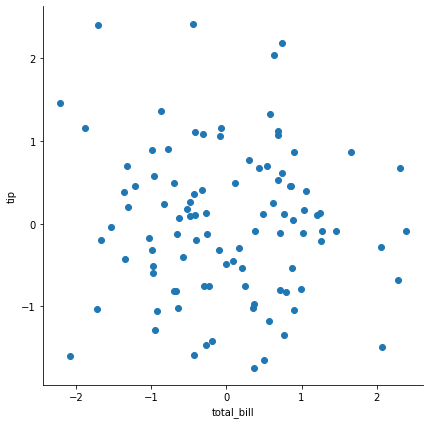

In [51]:
sns.FacetGrid(df, size=6) \
   .map(plt.scatter, "total_bill", "tip") \
   .add_legend()

plt.show()

<span style="color: rgba(55,227,27,1); font-size: 26px;">Preprocessing Steps: Separating Independent Features and Dependant Feature(Response)</span>

In [52]:
features = list(df.columns[1:6])            	
target = df.columns[6]                     

print('Features:',features)
print('Target:',target)

# store feature matrix in "X"
X = df.iloc[:,1:6]                         

# store response vector in "y"
y = df.iloc[:,6]                           


print(y.shape)
print(X.shape)

Features: ['tip', 'sex', 'smoker', 'day', 'time']
Target: size
(100,)
(100, 5)


<span style="color: rgba(55,227,27,1); font-size: 26px;">Converting Response Variable 'Size' to numbers to train model and add column</span>

In [53]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)
y=le.transform(y)


df['Encodedsize'] = y

print('Classes:',le.classes_)
print('Response variable after encoding:',y)
df.tail(10)

Classes: [-2.80050173 -2.06713468 -2.00149187 -1.90671285 -1.81691558 -1.63786113
 -1.57538469 -1.54565171 -1.5095015  -1.46241333 -1.41964102 -1.27550712
 -1.25229871 -1.22799082 -1.17503327 -1.17431554 -1.17300604 -1.03800807
 -1.02373465 -1.02157256 -1.0120264  -0.99997224 -0.98080122 -0.9617658
 -0.93801199 -0.86725111 -0.80294841 -0.66537106 -0.55940652 -0.51805458
 -0.49340286 -0.42834901 -0.4225556  -0.27608623 -0.26399778 -0.24484038
 -0.20738024 -0.18584133 -0.15480893 -0.13051982 -0.10981837 -0.0878123
 -0.07235854 -0.01877571 -0.00728929  0.00866548  0.04648602  0.05423164
  0.07868104  0.08625844  0.11717876  0.12229528  0.13781664  0.16787639
  0.1692395   0.19547071  0.2344717   0.24269004  0.26569136  0.27313421
  0.27624072  0.27833401  0.31662052  0.39347478  0.4142252   0.43970032
  0.45961574  0.47121986  0.48442029  0.50896961  0.52165524  0.52334637
  0.53514753  0.54060431  0.5460899   0.55650287  0.5579195   0.57049382
  0.57366135  0.57557758  0.59489666  0.6801

,total_bill,tip,sex,smoker,day,time,size,Encodedsize
-110.954304,-0.771751,0.899815,0.129349,-1.217524,0.761188,-0.275339,-1.275507,11
-165.124480,0.987124,-0.795205,-0.872747,-0.738741,0.576111,-0.065739,-1.174316,15
-202.884272,-1.309768,0.207264,-0.145871,-2.287927,0.563766,-0.485350,0.265691,58
-137.656179,0.349302,-1.013839,-1.598849,1.517235,0.414190,0.148523,-1.227991,13
11.678728,-0.993193,0.896895,0.205686,-0.446952,0.094309,-0.370362,0.757061,83
-91.495675,0.203086,-0.531467,0.542223,-0.159302,0.330832,-1.106709,-0.263998,34
-40.117377,-0.640580,-1.023641,0.662926,0.938714,0.122477,0.215941,-1.012026,20
212.127112,1.062697,0.401778,0.357254,-0.439415,0.435310,1.243164,0.573661,78
-60.380382,-1.668718,-0.197205,-0.241589,-0.647102,-0.480962,0.868786,0.523346,71
-71.043139,-0.432532,-1.593354,0.831818,2.077853,0.287324,-1.029164,-0.559407,28


<span style="color: rgba(55,227,27,1); font-size: 26px;">Classification Models</span><br>
<span style="color: rgba(55,227,27,1); font-size: 26px;">1 KNN Model</span>

In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

In [55]:
value = knn.predict([[3, 5, 4, 2, 1]])
print('prediction value:',value)

print('Predicted Class', df.loc[df['Encodedsize'] == 2, 'size'].values[0])

prediction value: [55]
Predicted Class -2.0014918660400074


In [56]:
X_new = [[3, 5, 4, 2, 1], [5, 4, 3, 2, 1]]                       
knn.predict(X_new)

array([55, 55], dtype=int64)

In [57]:
knn = KNeighborsClassifier(n_neighbors=5)

# fit the model with data
knn.fit(X, y)

# predict the response for new observations
print(knn.predict(X_new))

kypred = knn.predict(X)

[4 4]


<span style="color: rgba(55,227,27,1); font-size: 26px;">How to check the best value for K?</span>

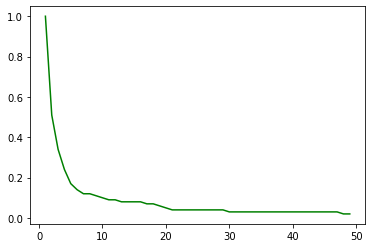

In [58]:
from sklearn import metrics
v=[]

k_range = list(range(1, 50))
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    # fit the model with data
    knn.fit(X, y)
    k_pred = knn.predict(X)
    v.append( metrics.accuracy_score(y, k_pred))


import matplotlib.pyplot as plt
plt.plot(k_range,v,c='Green',)
plt.show()

<span style="color: rgba(55,227,27,1); font-size: 26px;">KNN ACCURACY</span>

In [59]:
from sklearn import metrics
print(metrics.accuracy_score(y, kypred))

0.17


<span style="color: rgba(55,227,27,1); font-size: 26px;">Evaluation procedure: Train/test split</span>

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

In [61]:
print(X_train.shape)
print(y_train.shape)

(60, 5)
(60,)


<span style="color: rgba(55,227,27,1); font-size: 26px;">KNN with Train Test</span>

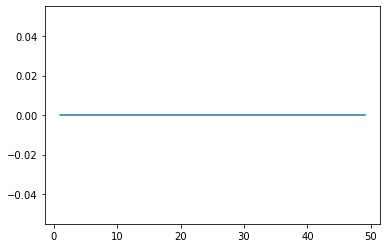

In [62]:
from sklearn import metrics
v=[]


k_range = list(range(1, 50))
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    # fit the model with data
    knn.fit(X_train, y_train)
    k_pred = knn.predict(X_test)
    v.append( metrics.accuracy_score(y_test, k_pred))



import matplotlib.pyplot as plt
plt.plot(k_range,v)

plt.show()

In [63]:
knn = KNeighborsClassifier(n_neighbors=12)
# fit the model with data
knn.fit(X_train, y_train)
k_pred = knn.predict(X_test)

metrics.accuracy_score(y_test, k_pred)

0.0